In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys, os

sys.path.insert(0, ".")
os.chdir("..")
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [3]:
import matplotlib.pyplot as plt

from latex_decompiler.monitoring import plot_accuracies
from pixel_art.analysis.kl_experiment import (
    kl_names,
    compute_all_kl_results,
)

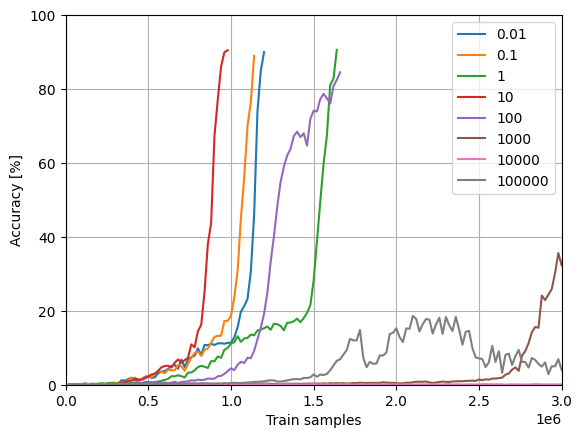

In [4]:
for k in kl_names:
    plot_accuracies(plt.gca(), kl_names[k], label=k)
plt.legend()
plt.xlim(0, 3e6)
plt.ylim(0, 100)
plt.grid()
plt.show()

In [5]:
kl_results = compute_all_kl_results()

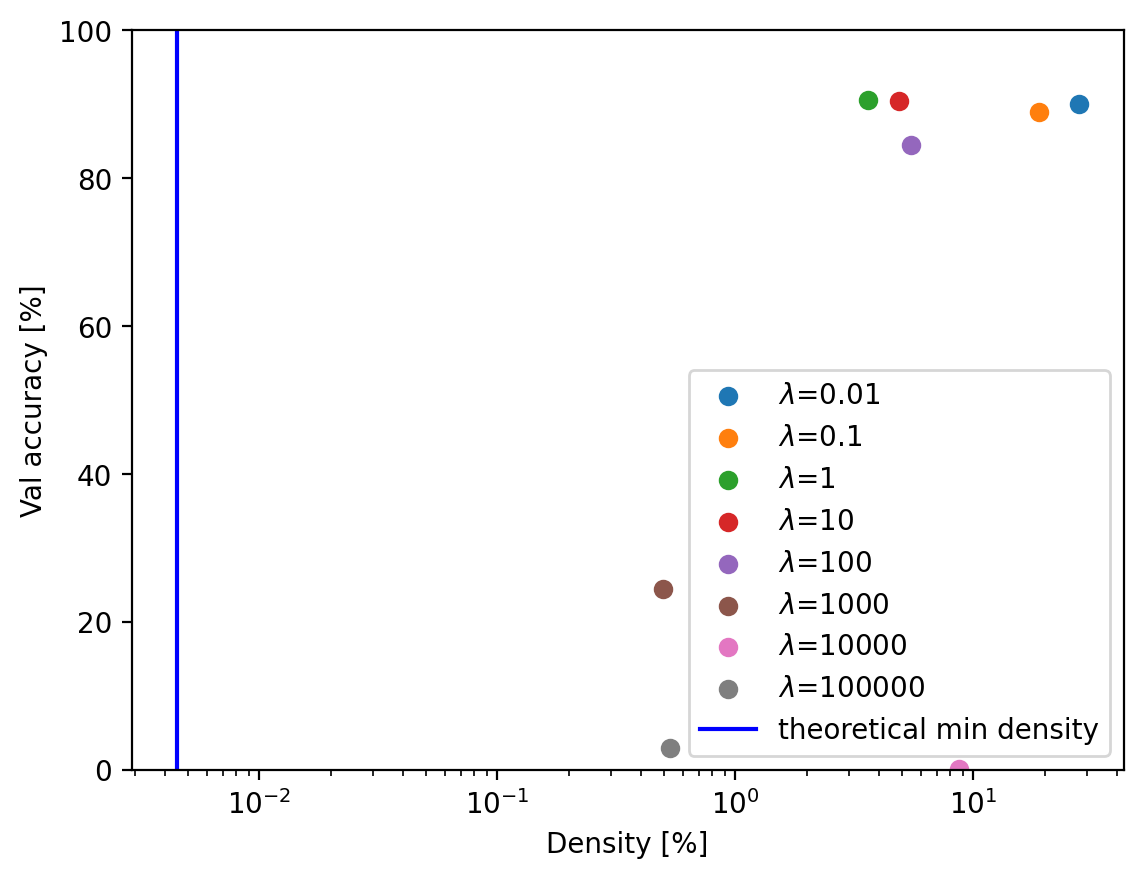

In [6]:
plt.figure(dpi=200, facecolor="white")
for k in sorted(kl_results):
    r = kl_results[k]
    plt.scatter([r["density"]], [r["val_acc"]], label=f"$\\lambda$={k}")
plt.xlabel("Density [%]")
plt.ylabel("Val accuracy [%]")
plt.ylim(0, 100)
plt.xscale("log")
plt.axvline(100 * 4.492e-05, label="theoretical min density", color="blue")
plt.legend()
# plt.savefig("output/pixel_art_l1.png")
plt.show()

In [7]:
def kl(p, phat):
    import numpy as np
    return p  * np.log(p / phat) + (1 - p) * np.log((1 - p) / (1 - phat))